In [7]:
import numpy as np
from matplotlib import pyplot as plt
import random

In [54]:
n = 10
xy_min = [0, 0]
xy_max = [10, 10]
data = np.random.uniform(low=xy_min, high=xy_max, size=(100,2))
x1=data[:,0]
x2=data[:,1]

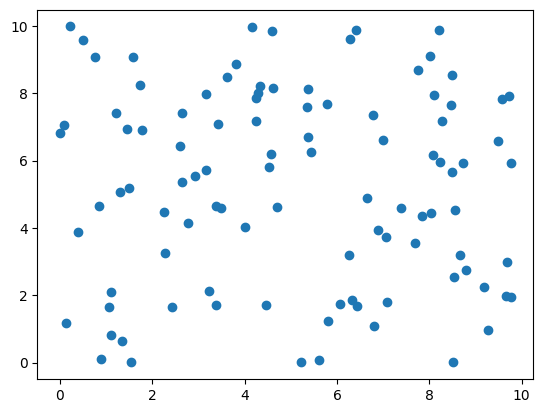

In [55]:
plt.scatter(x1,x2)

In [56]:
def distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2)**2))

def k_means(data, k):
    m, n = data.shape
    u = data[random.sample(range(m), k)]
    cost=[]
    itr=0
    while True:
        clusters = [[] for j in range(k)]
        error=[]
        for point in data:
            distances = [distance(point, centroid) for centroid in u]
            cluster_index = np.argmin(distances)
            error.append(distances[cluster_index])
            clusters[cluster_index].append(point)
        for j in range(k):
            u[j] = np.mean(clusters[j], axis=0)
        cost.append(sum(error)/m)
        if itr>=1:
            if abs(cost[-1]-cost[-2]<.000001):
                break
        itr = itr+1
                
                
    return u, clusters,cost[-1]

 

In [57]:
def opt_kmaen(data, k):
    costs=[]
    
    for i in range(10):
        u, clusters,cost=k_means(data, k)
        costs.append(cost)
    return u, clusters,min(costs)
        
        

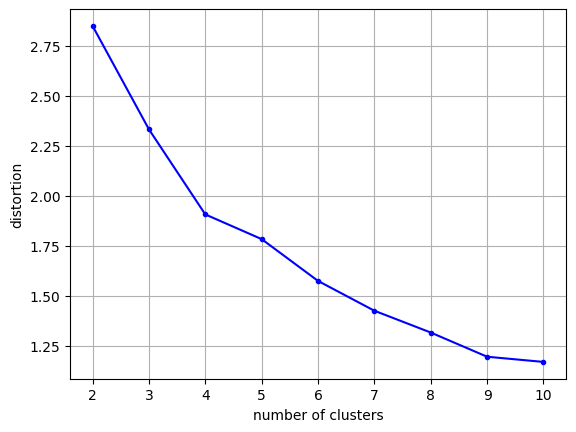

In [58]:
cost_per_k=[]
itr=[]
for i  in range(2,11):
    u, clusters,cost=opt_kmaen(data, i)
    cost_per_k.append(cost)
    itr.append(i)

plt.plot(itr,cost_per_k,".b-")
plt.xlabel('number of clusters')
plt.ylabel('distortion')
plt.grid(True)
plt.show()


In [59]:
u, clusters,cost=opt_kmaen(data,7)
u   

array([[7.94439913, 3.63786683],
       [1.62701558, 1.19967015],
       [8.4207901 , 7.34962712],
       [3.23072561, 4.88630356],
       [0.95574168, 7.13475893],
       [4.58655728, 8.0499913 ],
       [7.00314262, 1.23906843]])

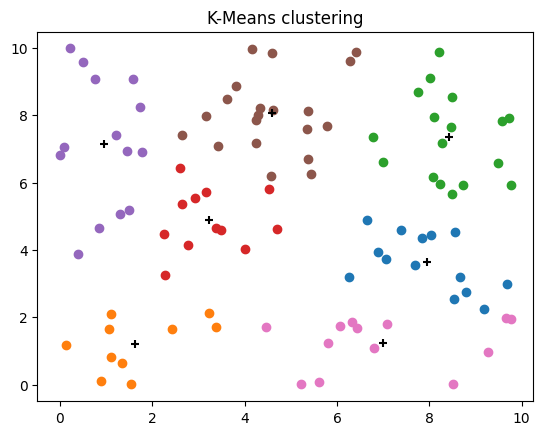

In [60]:
for cluster in clusters:
    X=[]
    Y=[]
    for x,y in cluster:
        X.append(x)
        Y.append(y)
    plt.scatter(X,Y)
        
plt.scatter(u[:,0],u[:,1],marker="+",color="black")
plt.title("K-Means clustering")
plt.show()